## 파이썬의 HTML Parser, BeautifulSoup

<br>

### BeautifulSoup 🍲
지난 실습의 `requests`를 이용하여 HTTP 요청을 보내고, 응답을 받아 요소를 살펴볼 수 있었다(Week4_1_HTTP_통신_코드).  
그러나 `res.body`를 하였을 때 내용이 구분되지 않고 단순히 텍스트로만 응답이 와서 분석하기 쉽지 않았던 문데가 있었음!
<br>
이때 **내가 원하는 요소만을 가져오기** 위하여 **HTML Parser**이용할 수 있다.  
그 중 가장 유명한 것이 `BeautifulSoup4`!  
<br><br>
<img src="https://beautiful-soup-4.readthedocs.io/en/latest/_images/6.1.jpg" width="300" align="left">
<br><br><br><br>
<img src="https://daedalus-ldv.de/wp-content/uploads/2022/02/bs.png" width="300" align="center">

<br><br>



### 0. BeutifulSoup install & import

In [3]:
#install
%pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


이미 모듈이 설치되어있었다.


### 1. BeautifulSoup 객체 만들기
HTML 분석하기 위한 HTTP 불러오기


In [7]:
# request 모듈 불러오기  
import requests as req

# www.example.com 사이트 요청 후 응답 받아보기 
res =req.get("https://www.example.com")

res.text

'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 2em;\n        background-color: #fdfdff;\n        border-radius: 0.5em;\n        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        div {\n            margin: 0 auto;\n            width: auto;\n        }\n    }\n    </style>    \n</head>\n\n<body>\n<div>\n    <

### 2. 응답을 HTML parser에 전달하기
지난 실습과 동일한 방법으로 HTTP 요청을 보내고, 응답을 받아보았다.
이런식으로 읽어온다면 어디서 얼만큼이 hearder인지, body인지, 속성은 어떻게 되는지 분석하기 쉽지 않다.  
<br>
따라서 HTML parser에 전달하여 분석하기 쉽게 한다.

In [10]:
# BeautifulSoup4 (bs4) 불러온다.

from bs4 import BeautifulSoup

이렇게 불러온 bs4 사용하기 위해, BeautifulSoup 객체를 생성해주어야함.  
이 때,  
- 첫번째 인자는 response의 body를 텍스트로 전달한다.
- 두번째 인자는 "html"로 분석한다는 것을 명시해준다.

In [33]:
# BeautifulSoup 객체를 만든다.

soup = BeautifulSoup(res.text, "html.parser")

'soup'이라는 변수는 이제 HTML 정보를 분석하여 가지고 있다.  
`.prettify()` 이용하면 분석된 HTML을 보기 편하게 반환해준다.

In [1]:
print(soup.prettify())

NameError: name 'soup' is not defined

### 3. .soup 이용해 HTML의 특정 요소 가지고 오기.

HTML이 들여쓰기 되어 가독성 좋게 출력된 것을 확인하였다.
이 `soup`이라는 객체를 통하여 우리는 HTML의 특정 요소를 가지고 올 수 있다. 

In [18]:
# title
soup.title

<title>Example Domain</title>

In [20]:
# head
soup.head()

[<title>Example Domain</title>,
 <meta charset="utf-8"/>,
 <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>,
 <meta content="width=device-width, initial-scale=1" name="viewport"/>,
 <style type="text/css">
     body {
         background-color: #f0f0f2;
         margin: 0;
         padding: 0;
         font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
         
     }
     div {
         width: 600px;
         margin: 5em auto;
         padding: 2em;
         background-color: #fdfdff;
         border-radius: 0.5em;
         box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
     }
     a:link, a:visited {
         color: #38488f;
         text-decoration: none;
     }
     @media (max-width: 700px) {
         div {
             margin: 0 auto;
             width: auto;
         }
     }
     </style>]

In [21]:
# body 
soup.body

<body>
<div>
<h1>Example Domain</h1>
<p>This domain is for use in illustrative examples in documents. You may use this
    domain in literature without prior coordination or asking for permission.</p>
<p><a href="https://www.iana.org/domains/example">More information...</a></p>
</div>
</body>

In [23]:
# 특정 요소 찾기:
# <h1> 태그로 감싸진 요소 하나 찾기.
 
soup.find("h1")

<h1>Example Domain</h1>

In [25]:
# <p> 태그로 감싸진 모든 요소 찾기.

soup.find_all("p")
# 찾은 모든 요소들을 list 타입으로 반환해줌!

[<p>This domain is for use in illustrative examples in documents. You may use this
     domain in literature without prior coordination or asking for permission.</p>,
 <p><a href="https://www.iana.org/domains/example">More information...</a></p>]

In [28]:
# 태그 이름 가져오기
h1= soup.find("h1")
h1.name

'h1'

In [31]:
# 태그 내용 가져오기

h1.text

'Example Domain'

### 4. BeautifulSoup 이용해 원하는 요소 가져오기 실습
### I. 특정 태그 이용하여 책 이름 모으기  (컨텐츠 기반 스크래핑)
<br>

Target: **Mock Book Data**
    
다음 사이트에 있는 책들의 이름 정보를 스크래핑 해보자!<br>
<span style="color:gray">(해당 웹 페이지는 임의의 책 정보가 담긴 웹 사이트 입니다.)</span>
<br>
https://books.toscrape.com/catalogue/category/books/travel_2/index.html
<br>



여기서는 **특정 태그**를 가진 부분을 긁어올것임. <br>
--> **컨텐츠 기반 스크래핑**<br><br>

<span style="color:gray">**\!** 사실 이 방법은 가장 간단하고 직관적이긴 하지만,  
타겟 사이트의 정보를 열어봐야하며, 변동 가능성이 있기 때문에 좋은 방법은 아님. </span>
<br><br>
#### 0. 웹페이지에서 원하는 정보가 어떤 태그 안에 들어가 있는지 확인해 보기 위하여 '개발자 도구'를 확인

<br>
위 사이트에 들어가서 개발자 도구를 열면 아래와 같음!
<br>

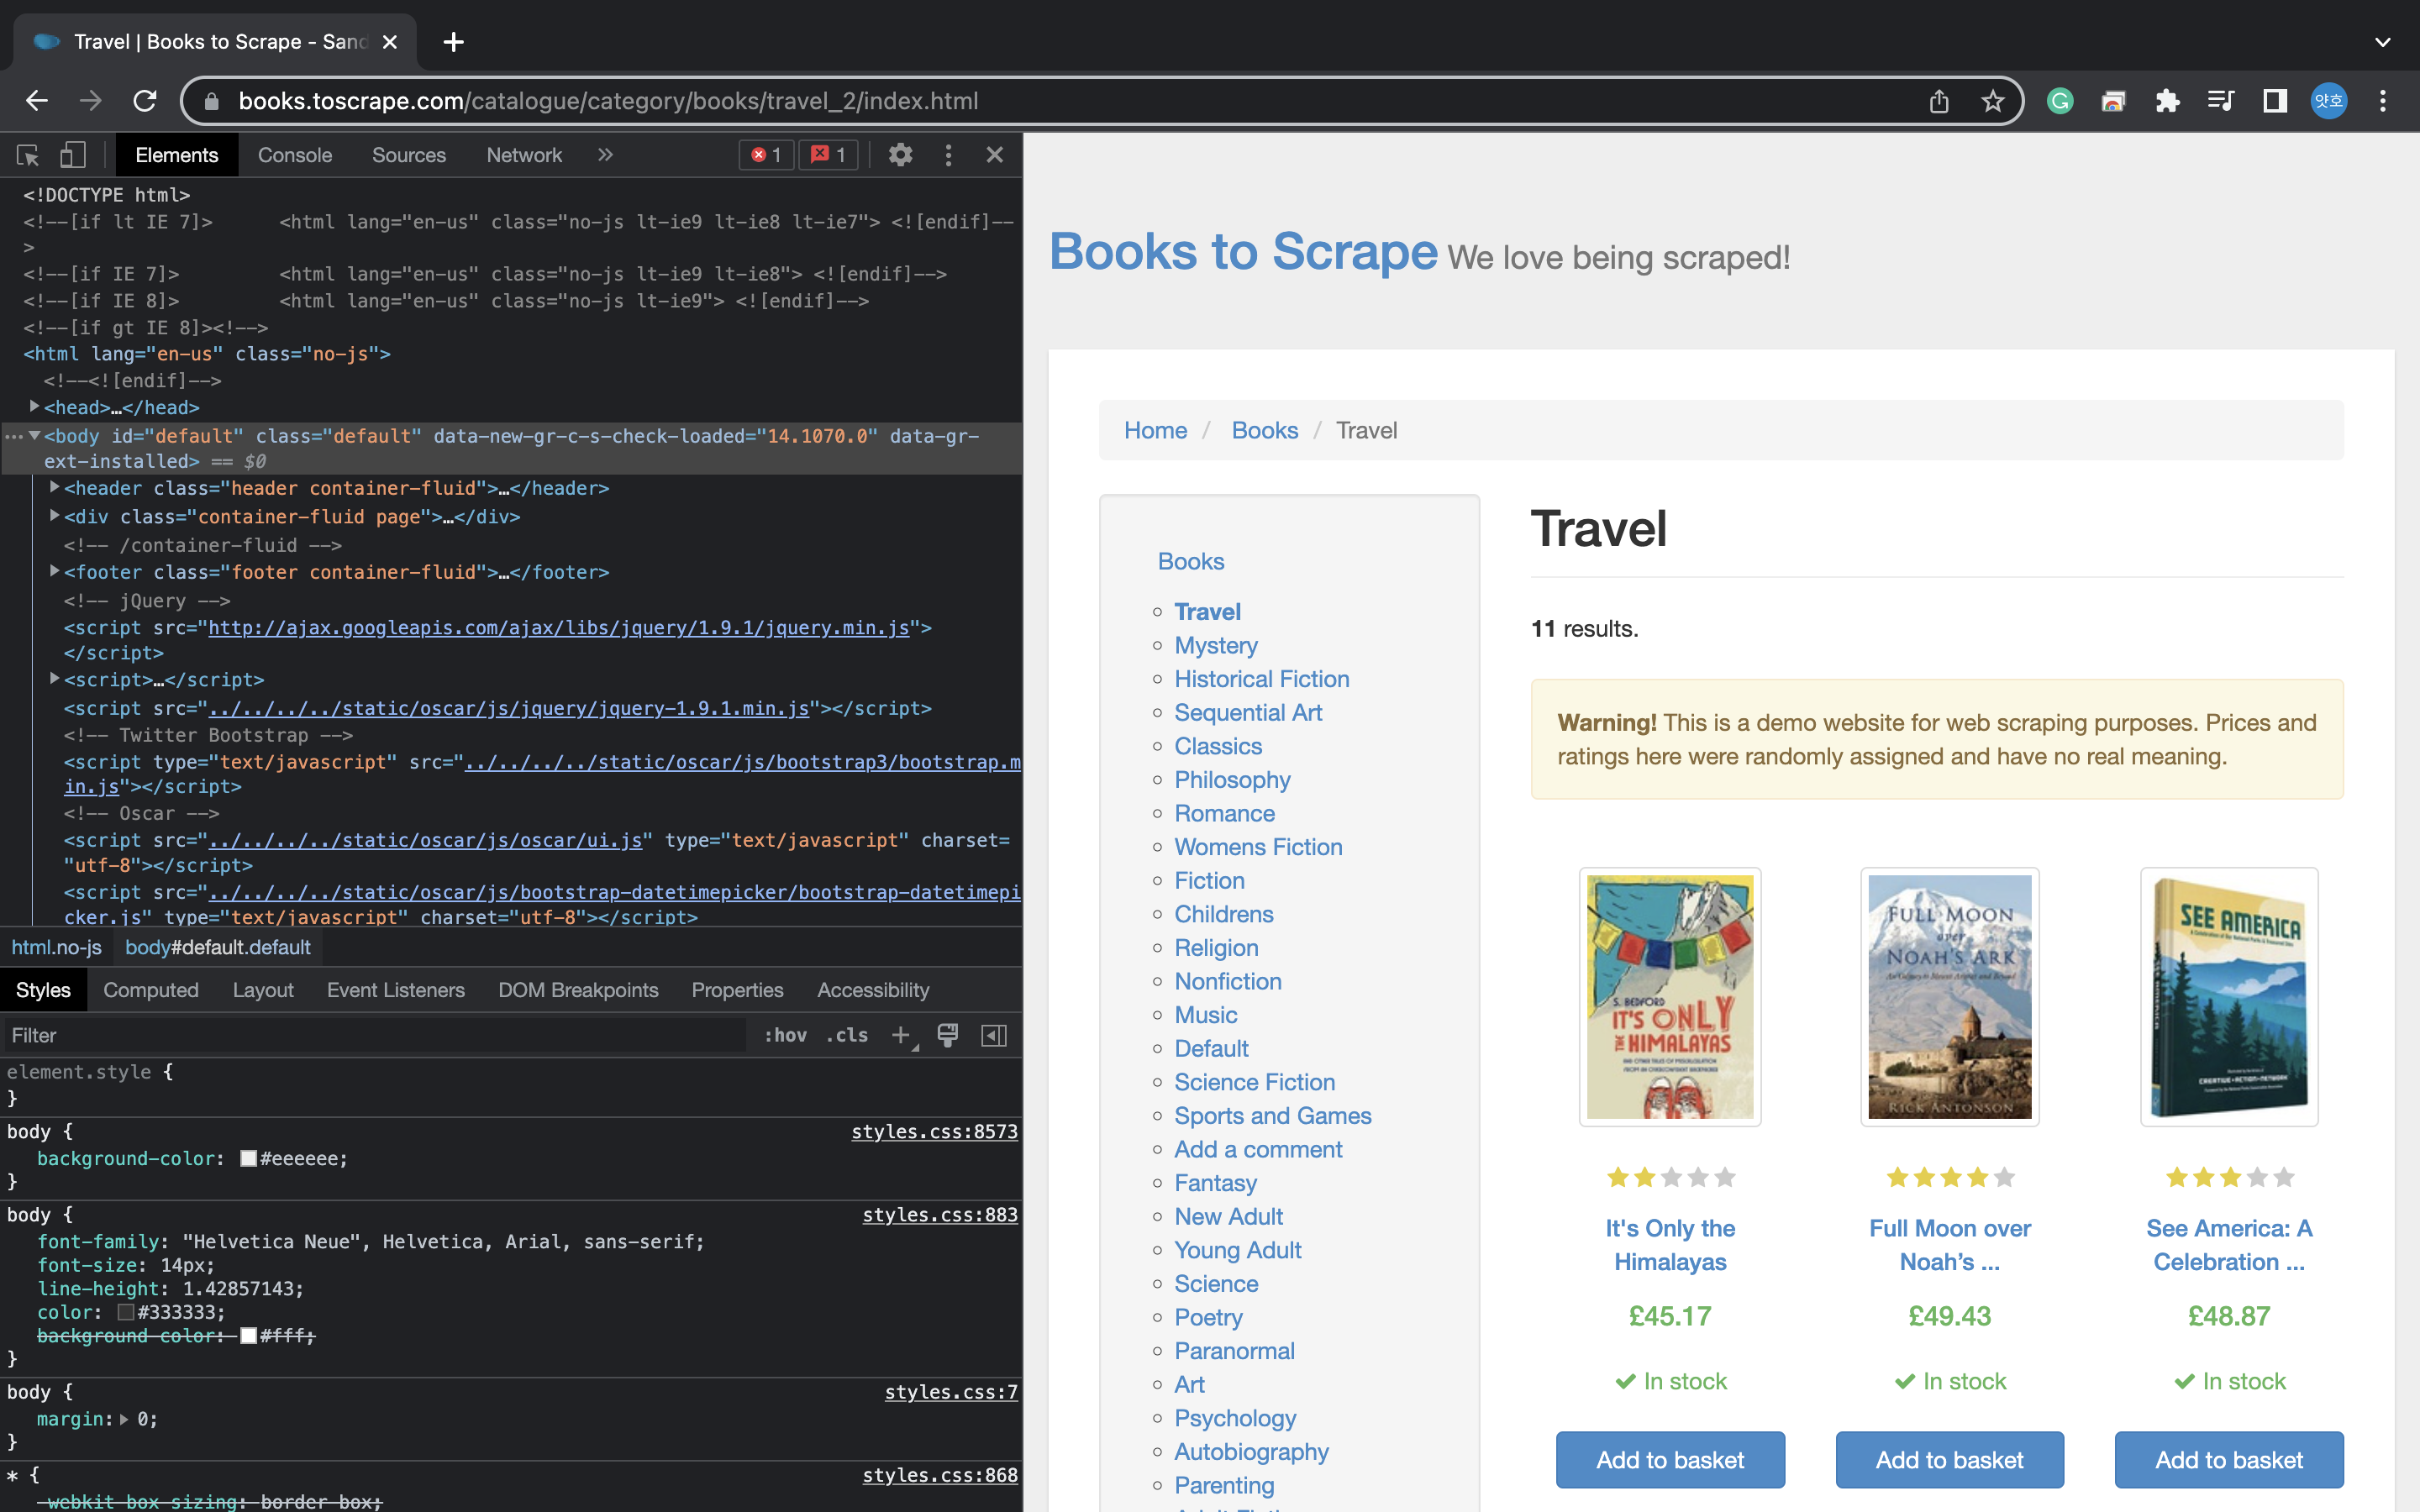

<br> 
크롬 개발자 도구의 경우, html 문서에 마우스를 올리면  
그에 해당하는 부분이 웹페이지에 표시됨!  
<br>

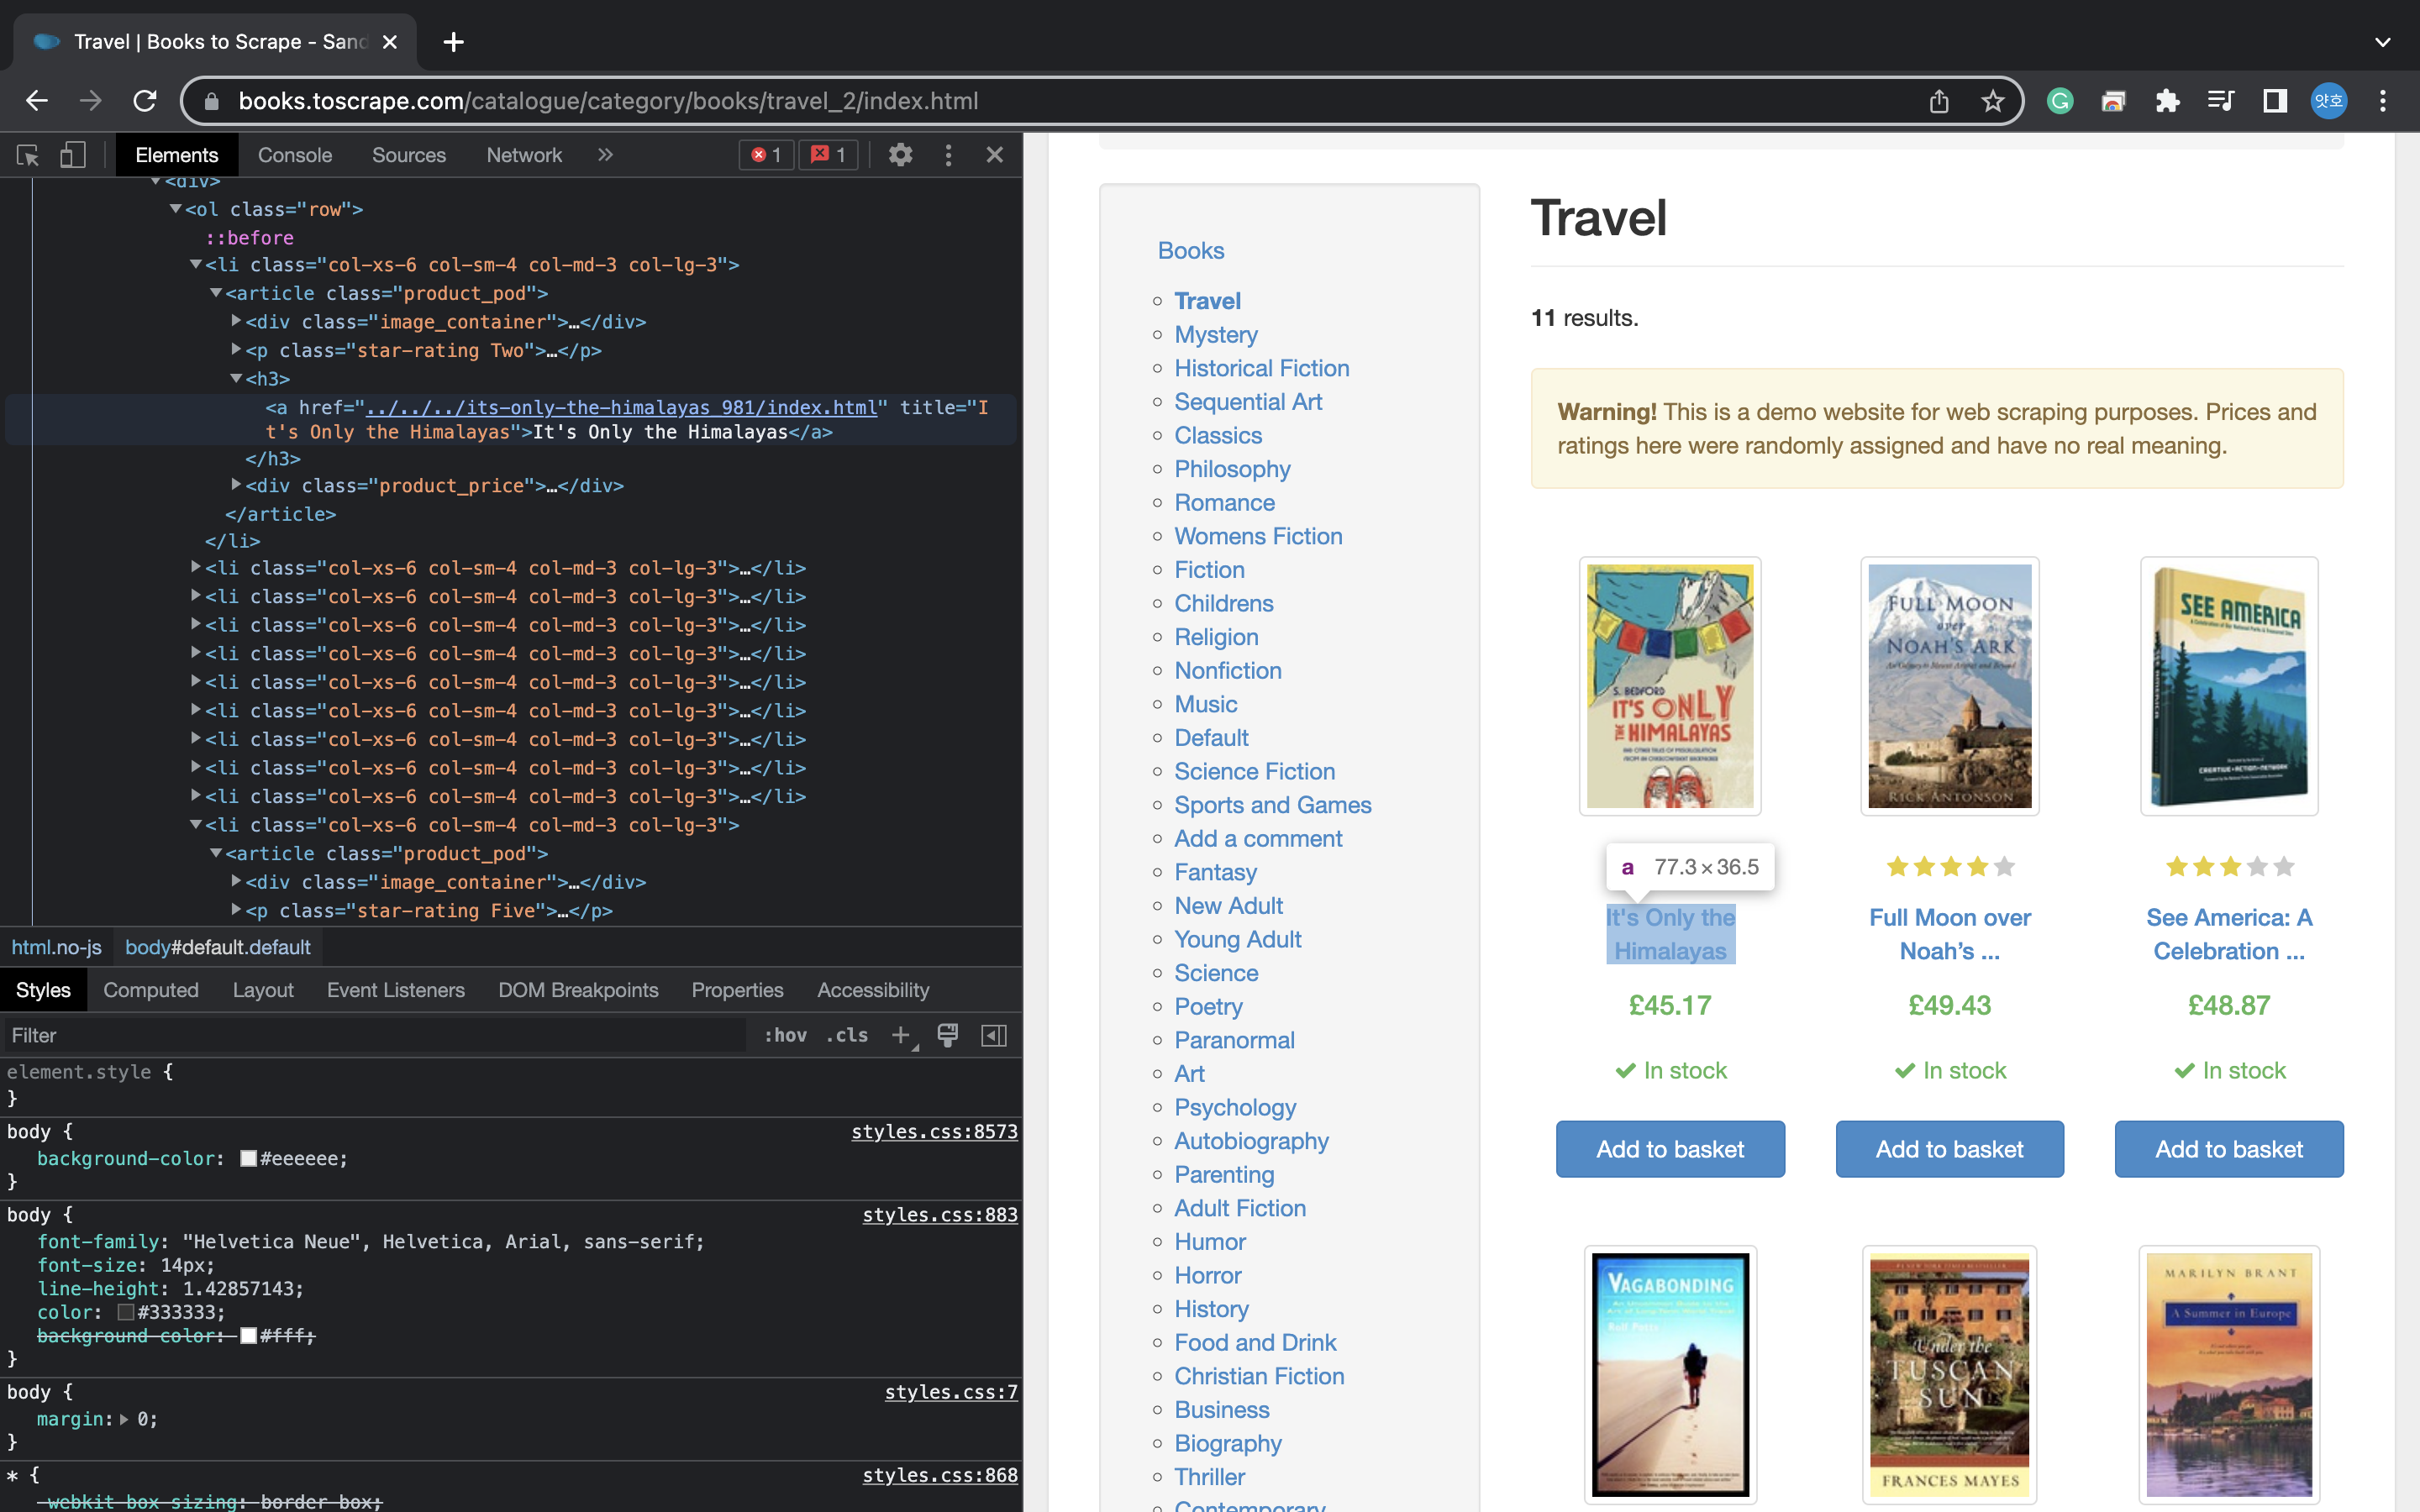
<br>
html 문서를 직접 읽어서 내가 원하는 정보가 어떤 태그 안에 있는지 직접 찾을 수도 있지만,  

(크롬 개발자 도구의 경우) 웹페이지에서 '원하는 정보 우클릭 -> 검사'하면 해당하는 것을 기술한 부분이 어디에 있는지 찾아줌..!
<br>

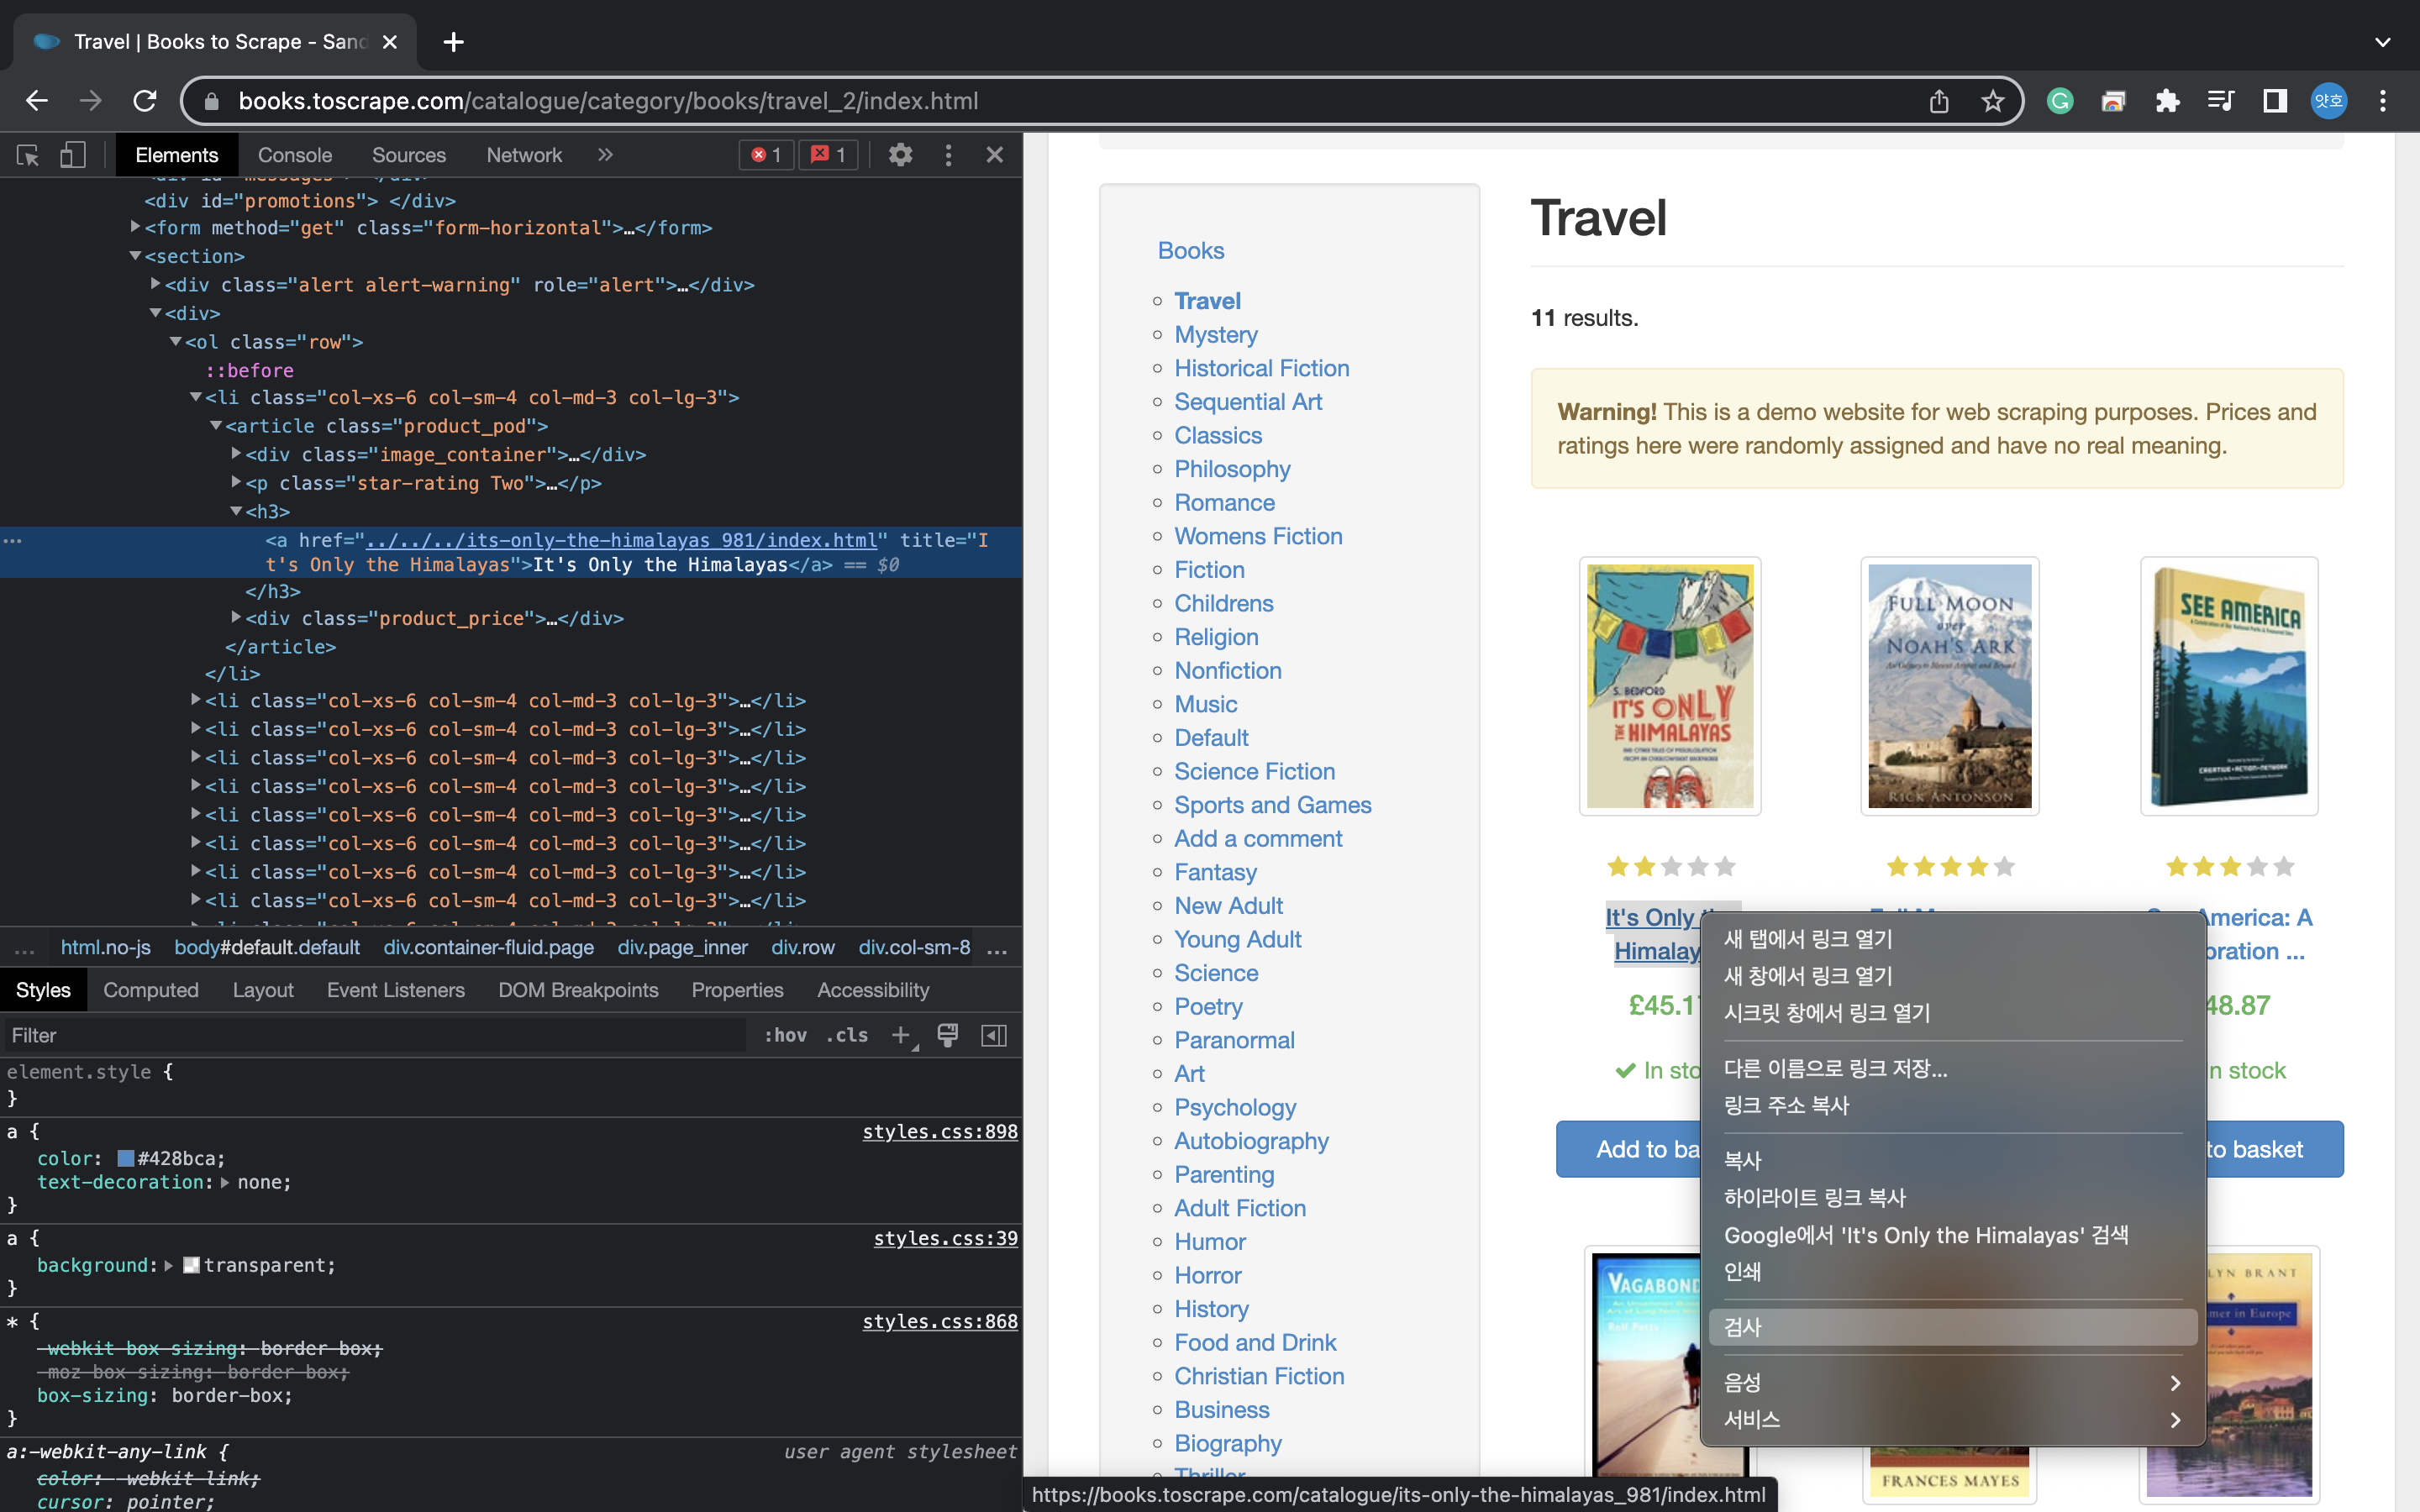
<br>

원하는 정보는 **h3** 안에 들어있었음!

#### 1. 스크래핑에 필요한 라이브러리 불러오기 : requests, beautifulsoup


#### 2. 예시 사이트에 요청을 진행하고, 응답을 바탕으로 beautifulsoup객체 만들기

In [35]:
target= "https://books.toscrape.com/catalogue/category/books/travel_2/index.html"

res= req.get(target)

soup= BeautifulSoup(res.text, "html.parser")

#### 3. h3 태그에 해당하는 요소를 하나 데려오기

In [37]:
soup.find("h3")

<h3><a href="../../../its-only-the-himalayas_981/index.html" title="It's Only the Himalayas">It's Only the Himalayas</a></h3>

In [40]:
# <h3> 태그에 해당하는 모든 요소 데려오기
h3_results = soup.find_all("h3")
len(h3_results)

11

찾아온 데이터들은 모두 **객체**이므로, 익숙한 방식으로 데이터 추출 가능!

#### 4. book_list에서 내가 원하는 제목만 추출

In [48]:
book = h3_results[0]
print(book.a.text)

It's Only the Himalayas


In [53]:
book_list = []
for book in h3_results:
    book_list.append(book.a["title"])

print(book_list)

["It's Only the Himalayas", 'Full Moon over Noahâ\x80\x99s Ark: An Odyssey to Mount Ararat and Beyond', 'See America: A Celebration of Our National Parks & Treasured Sites', 'Vagabonding: An Uncommon Guide to the Art of Long-Term World Travel', 'Under the Tuscan Sun', 'A Summer In Europe', 'The Great Railway Bazaar', 'A Year in Provence (Provence #1)', 'The Road to Little Dribbling: Adventures of an American in Britain (Notes From a Small Island #2)', 'Neither Here nor There: Travels in Europe', '1,000 Places to See Before You Die']


### 4. BeautifulSoup 이용해 원하는 요소 가져오기 실습
### II. Locator를 이용해 국가 이름 모으기  
<br>
실습 I 처럼 특정 태그 이름을 이용하여 원하는 자료를 스크래핑하면 문제가 발생할 가능성이 높다. <br> 
복잡한 웹페이지를 다루게되면 원하는 정보를 담고 있지 않지만 동일한 태그를 가지게 될 수 있다.<br>
이런 경우 원치 않는 데이터까지 가지고 오게 된다.  
<br><br>
이런 상황을 피하기 위해 html의 locator (id, class) 이용할 수 있다.  

http://example.python-scraping.com/
<br><br>
**`id`**와 **`class`**
태그는 자신의 이름 뿐 아니라 **고유한 속성** 또한 가질 수 있다.
이 중 id와 class는 Locator로서, **특정 태그를 지칭**하는데에 사용된다.
- `tagname`: 태그의 이름
- `id`: 하나의 고유 태그를 가리키는 레이블
- `class`: 여러 태그를 묶는 레이블 
<br><br>

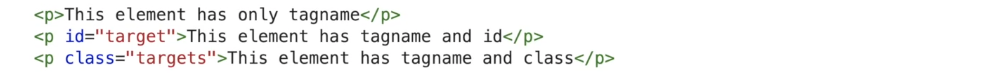


해당 사이트의 개발자 도구에서 html을 확인해보면 아래와 같다.  
<br>

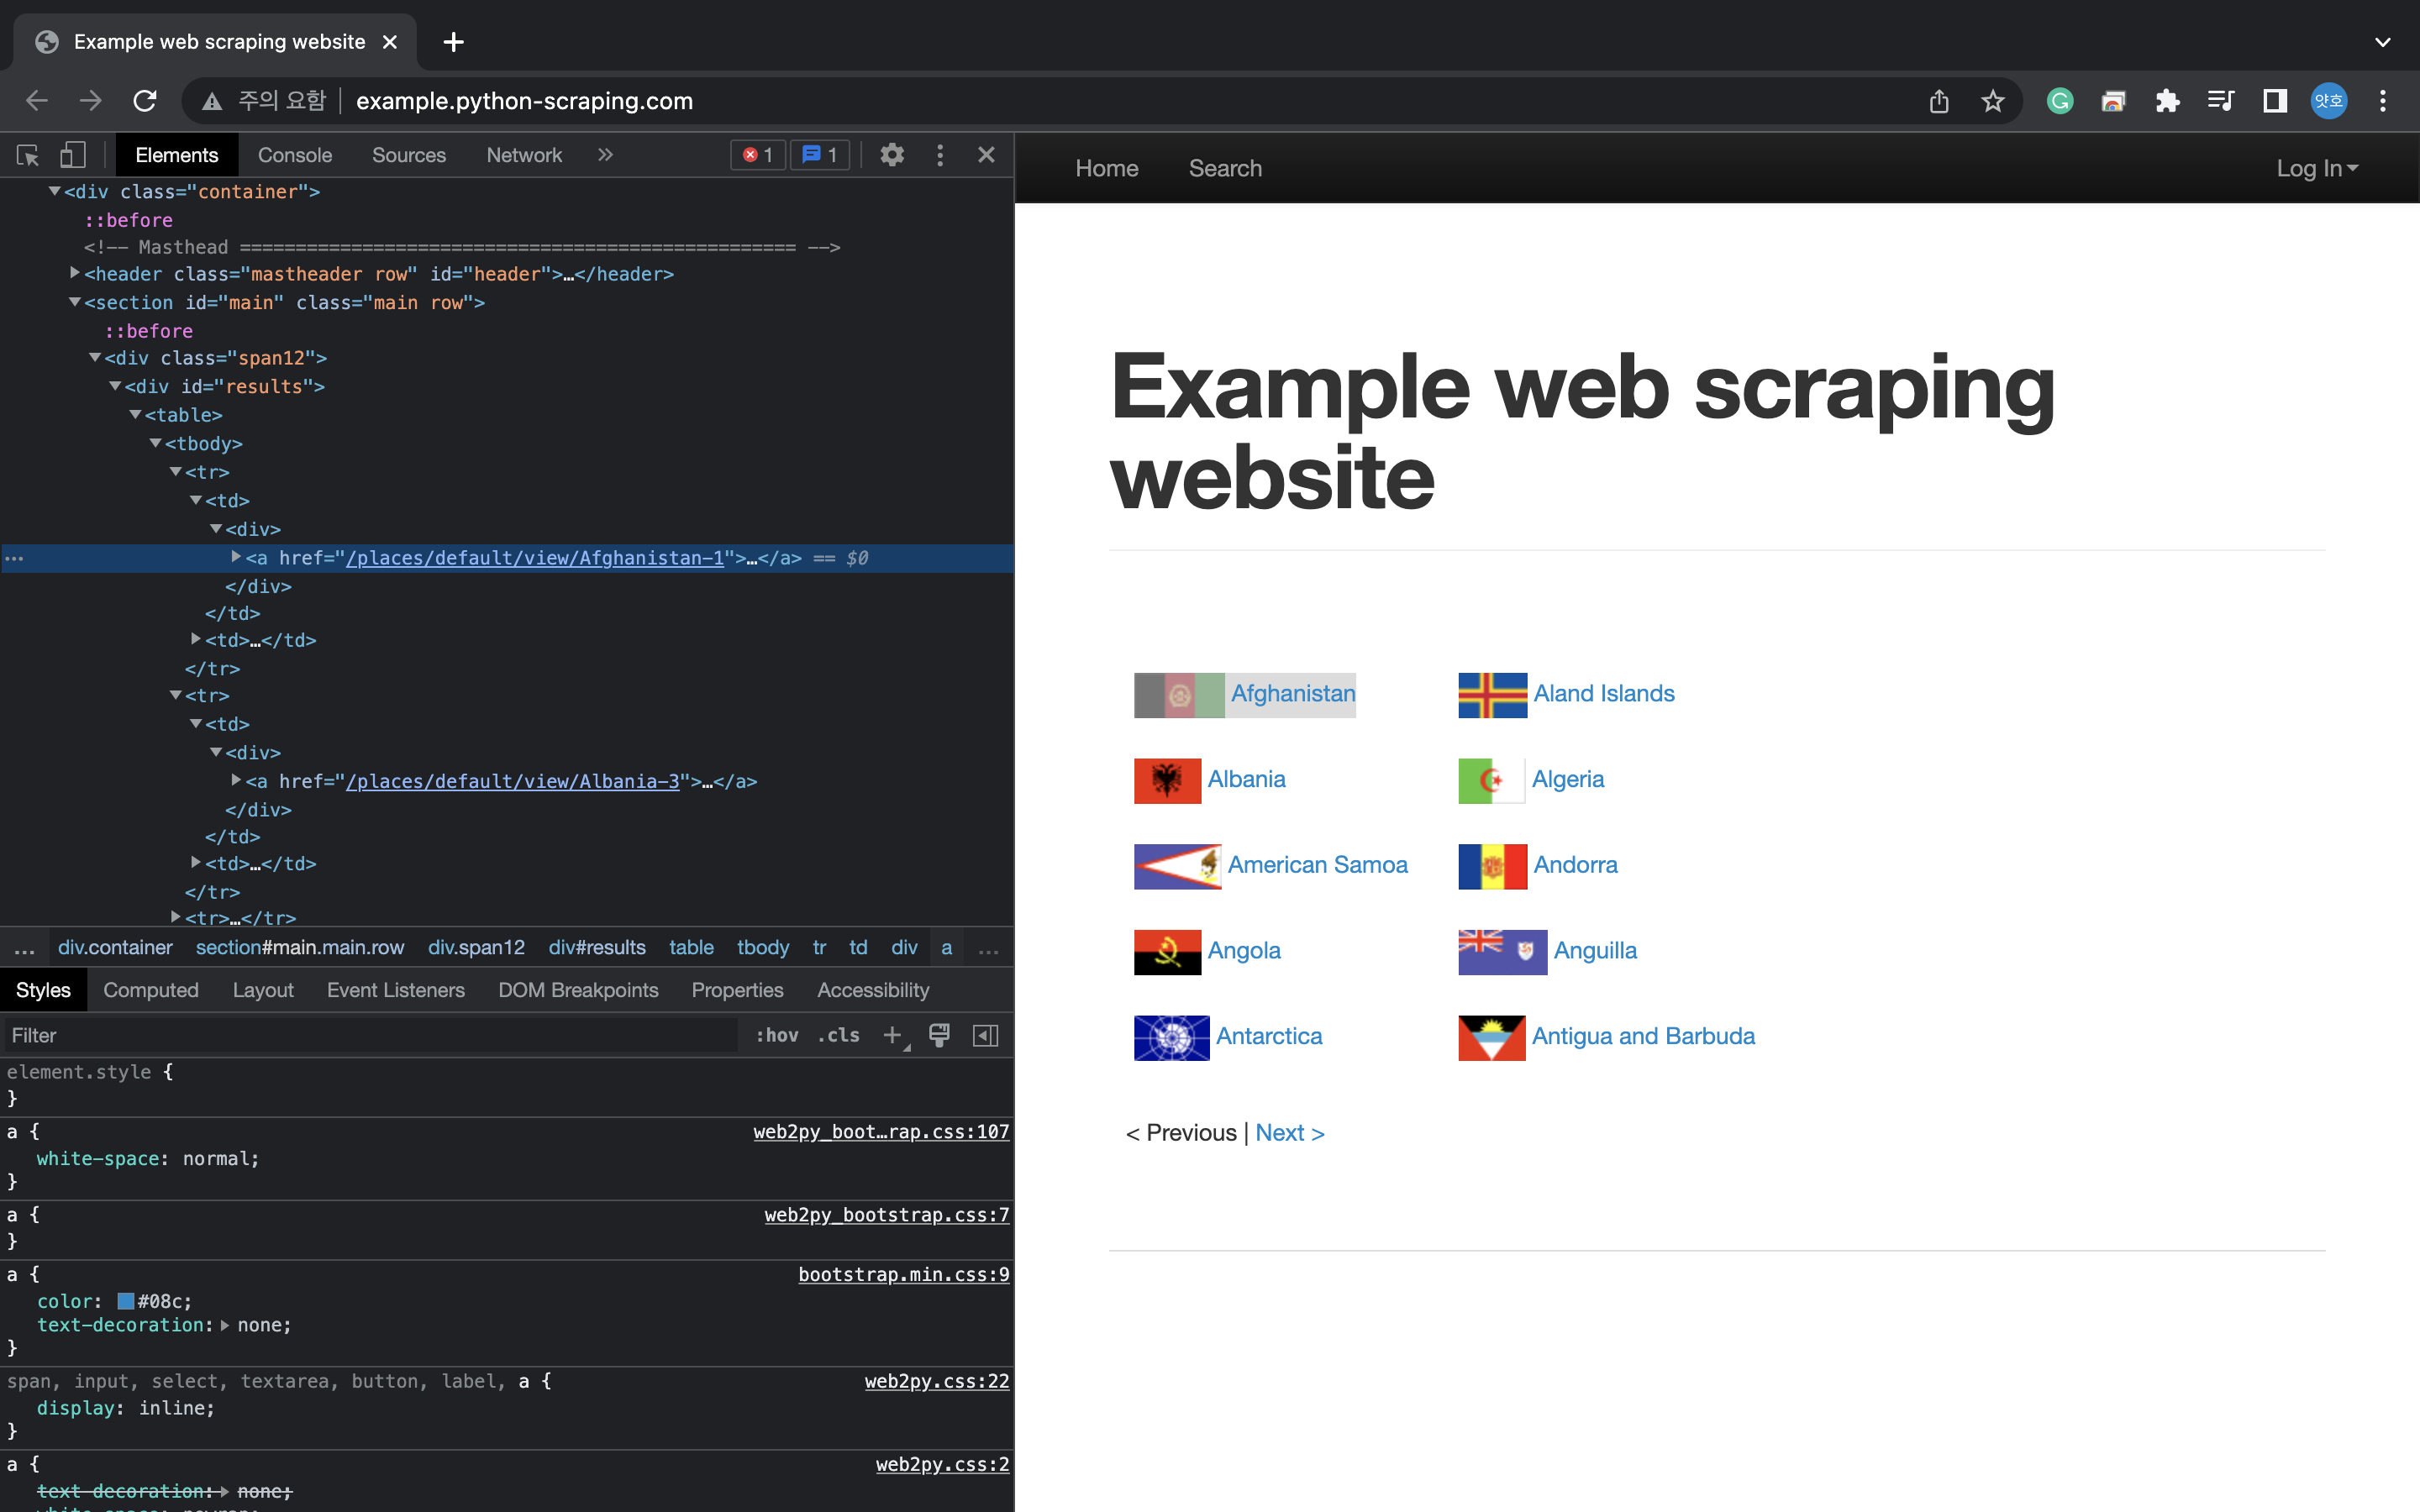

<br>
내가 찾고자 하는 '국가 이름'을 검사하여 html 상 위치를 추적해보면 내가 찾고하자는 `id`와 `class` 얻을 수 있다.  
이 경우 `id`는 <span style="color:orange">results</span>, `class`는 <span style="color:orange">span12</span>인 것을 확인 할 수 있다.


In [55]:
# 스크래핑에 필요한 라이브러리 불러오기 : requests, BeautifulSoup

In [63]:
# 아래 사이트에 요청을 보내고, 이것의 응답을 BeautifulSoup 객체로 보낸다. 
target = "http://example.python-scraping.com/"

res= req.get(target)
soup = BeautifulSoup(res.text, "html.parser")

#### i. `ìd`를 이용해 요소 가져오기 
- id는 요소 하나를 지칭하는 **특별한 별명**! **중복되지 않음**
- 따라서 id를 이용해 해당하는 태그 단 하나를 쉽게 가져올 수 있음
- `.find("<상위 태그>", id="<id>"`

In [65]:
idfind = soup.find("div",id="results")
print(idfind)

<div id="results">
<table><tr><td><div><a href="/places/default/view/Afghanistan-1"><img src="/places/static/images/flags/af.png"/> Afghanistan</a></div></td><td><div><a href="/places/default/view/Aland-Islands-2"><img src="/places/static/images/flags/ax.png"/> Aland Islands</a></div></td></tr><tr><td><div><a href="/places/default/view/Albania-3"><img src="/places/static/images/flags/al.png"/> Albania</a></div></td><td><div><a href="/places/default/view/Algeria-4"><img src="/places/static/images/flags/dz.png"/> Algeria</a></div></td></tr><tr><td><div><a href="/places/default/view/American-Samoa-5"><img src="/places/static/images/flags/as.png"/> American Samoa</a></div></td><td><div><a href="/places/default/view/Andorra-6"><img src="/places/static/images/flags/ad.png"/> Andorra</a></div></td></tr><tr><td><div><a href="/places/default/view/Angola-7"><img src="/places/static/images/flags/ao.png"/> Angola</a></div></td><td><div><a href="/places/default/view/Anguilla-8"><img src="/places/st

위의 결과는 아래와 같은 부분을 데려온 것!
<br>
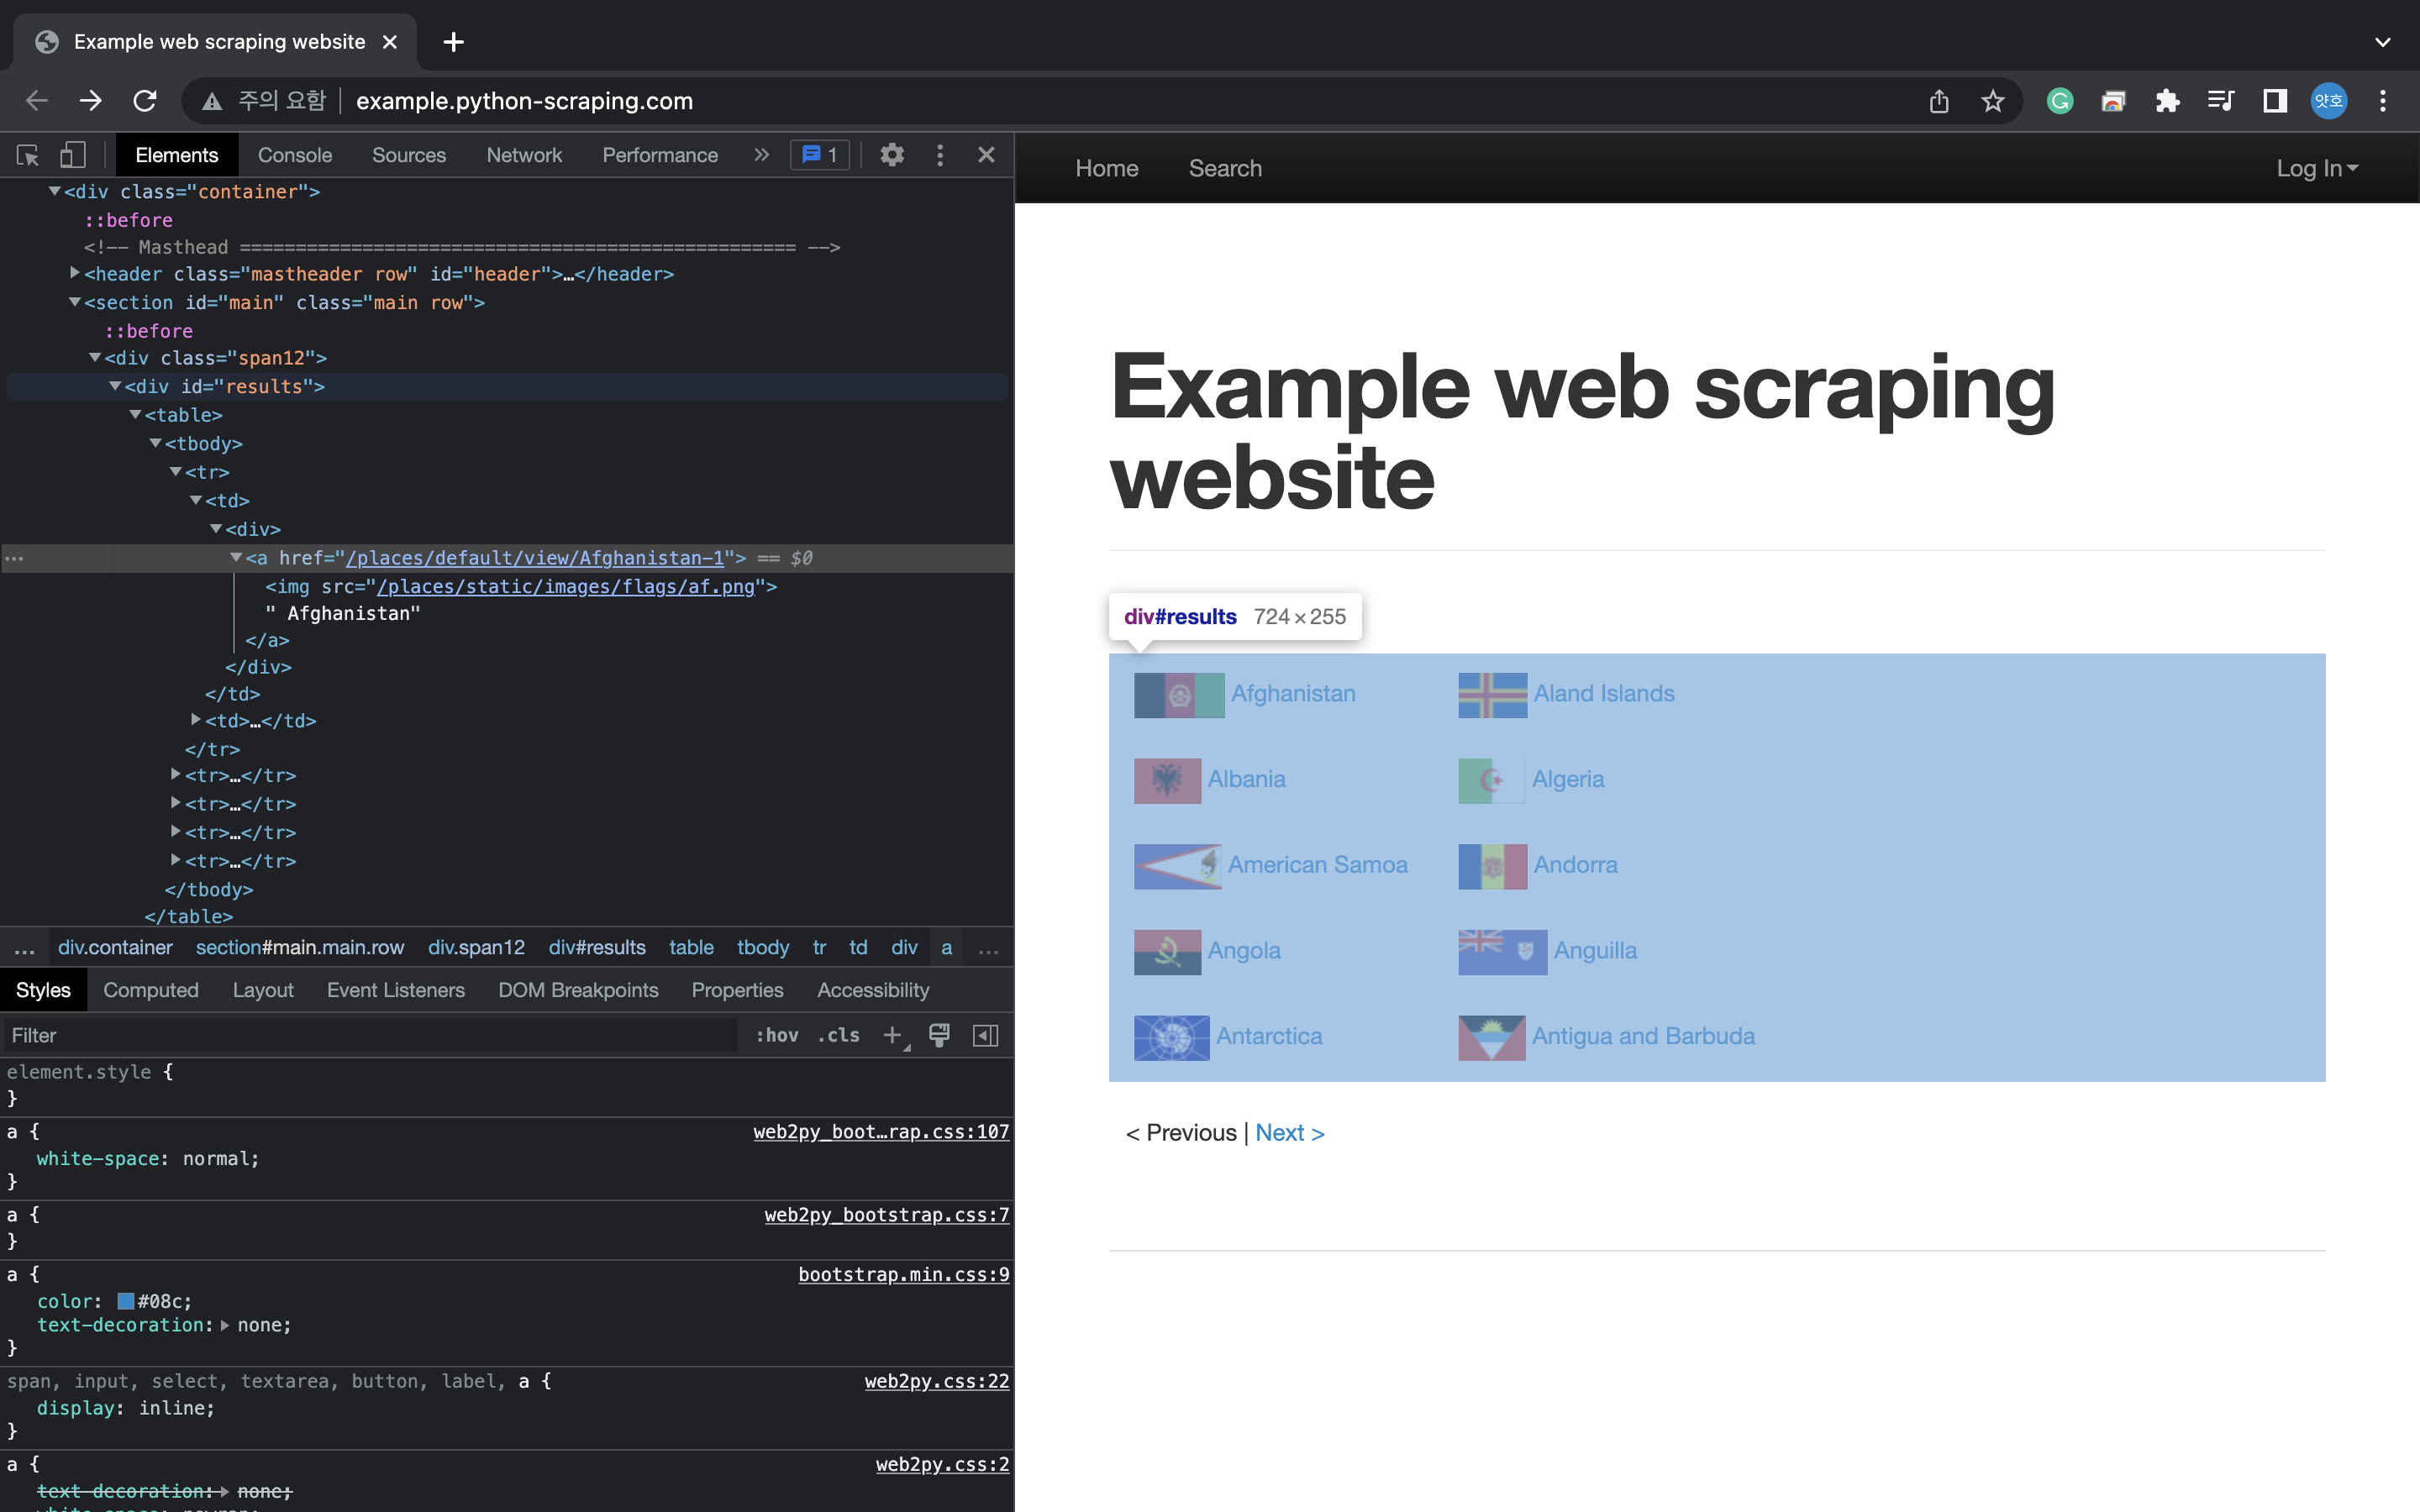

#### ii. `class` 이용해서 요소들 가져오기
- class는 **유사한 요소들을 구분**짓는 별명!
- class 이용해 해당하는 태그 하나 이상을 쉽게 가져올 수 있음!  
    e.g., 차트 속 데이터 
- `.find("<상위 태그>", class="<class>"`
- 결과는 객체이기 때문에 내부 요소에 접근 할 수 있음. e.g., `result.text`


In [68]:
# clas가 "page-header"인 div태그 찾기
soup.find("div", "page-header")

<div class="page-header">
<h1>
                    Example web scraping website
                    <small></small>
</h1>
</div>

In [74]:
class_find.h1.text.strip()

'Example web scraping website'

### 4. BeautifulSoup 이용해 원하는 요소 가져오기 실습
### III. Hashcode 질문 가져오기
<br>

#### 스크래핑하고자 하는 사이트 확인하기
직접 접속하여 해당 사이트를 확인해본다. https://hashcode.co.kr/  
<br>
⚠️ 이때 아래 두 가지 원칙을 지켜야 한다.  
1. 과도한 요청을 보내지 않는다.
2. 받아온 정보 활용에 유의한다.

#### 0-1. 찾고자 하는 정보가 html의 어느 태그에 담겨있는지 확인
: **li** 태그에서 class가 "**question-list-item**"인 정보!

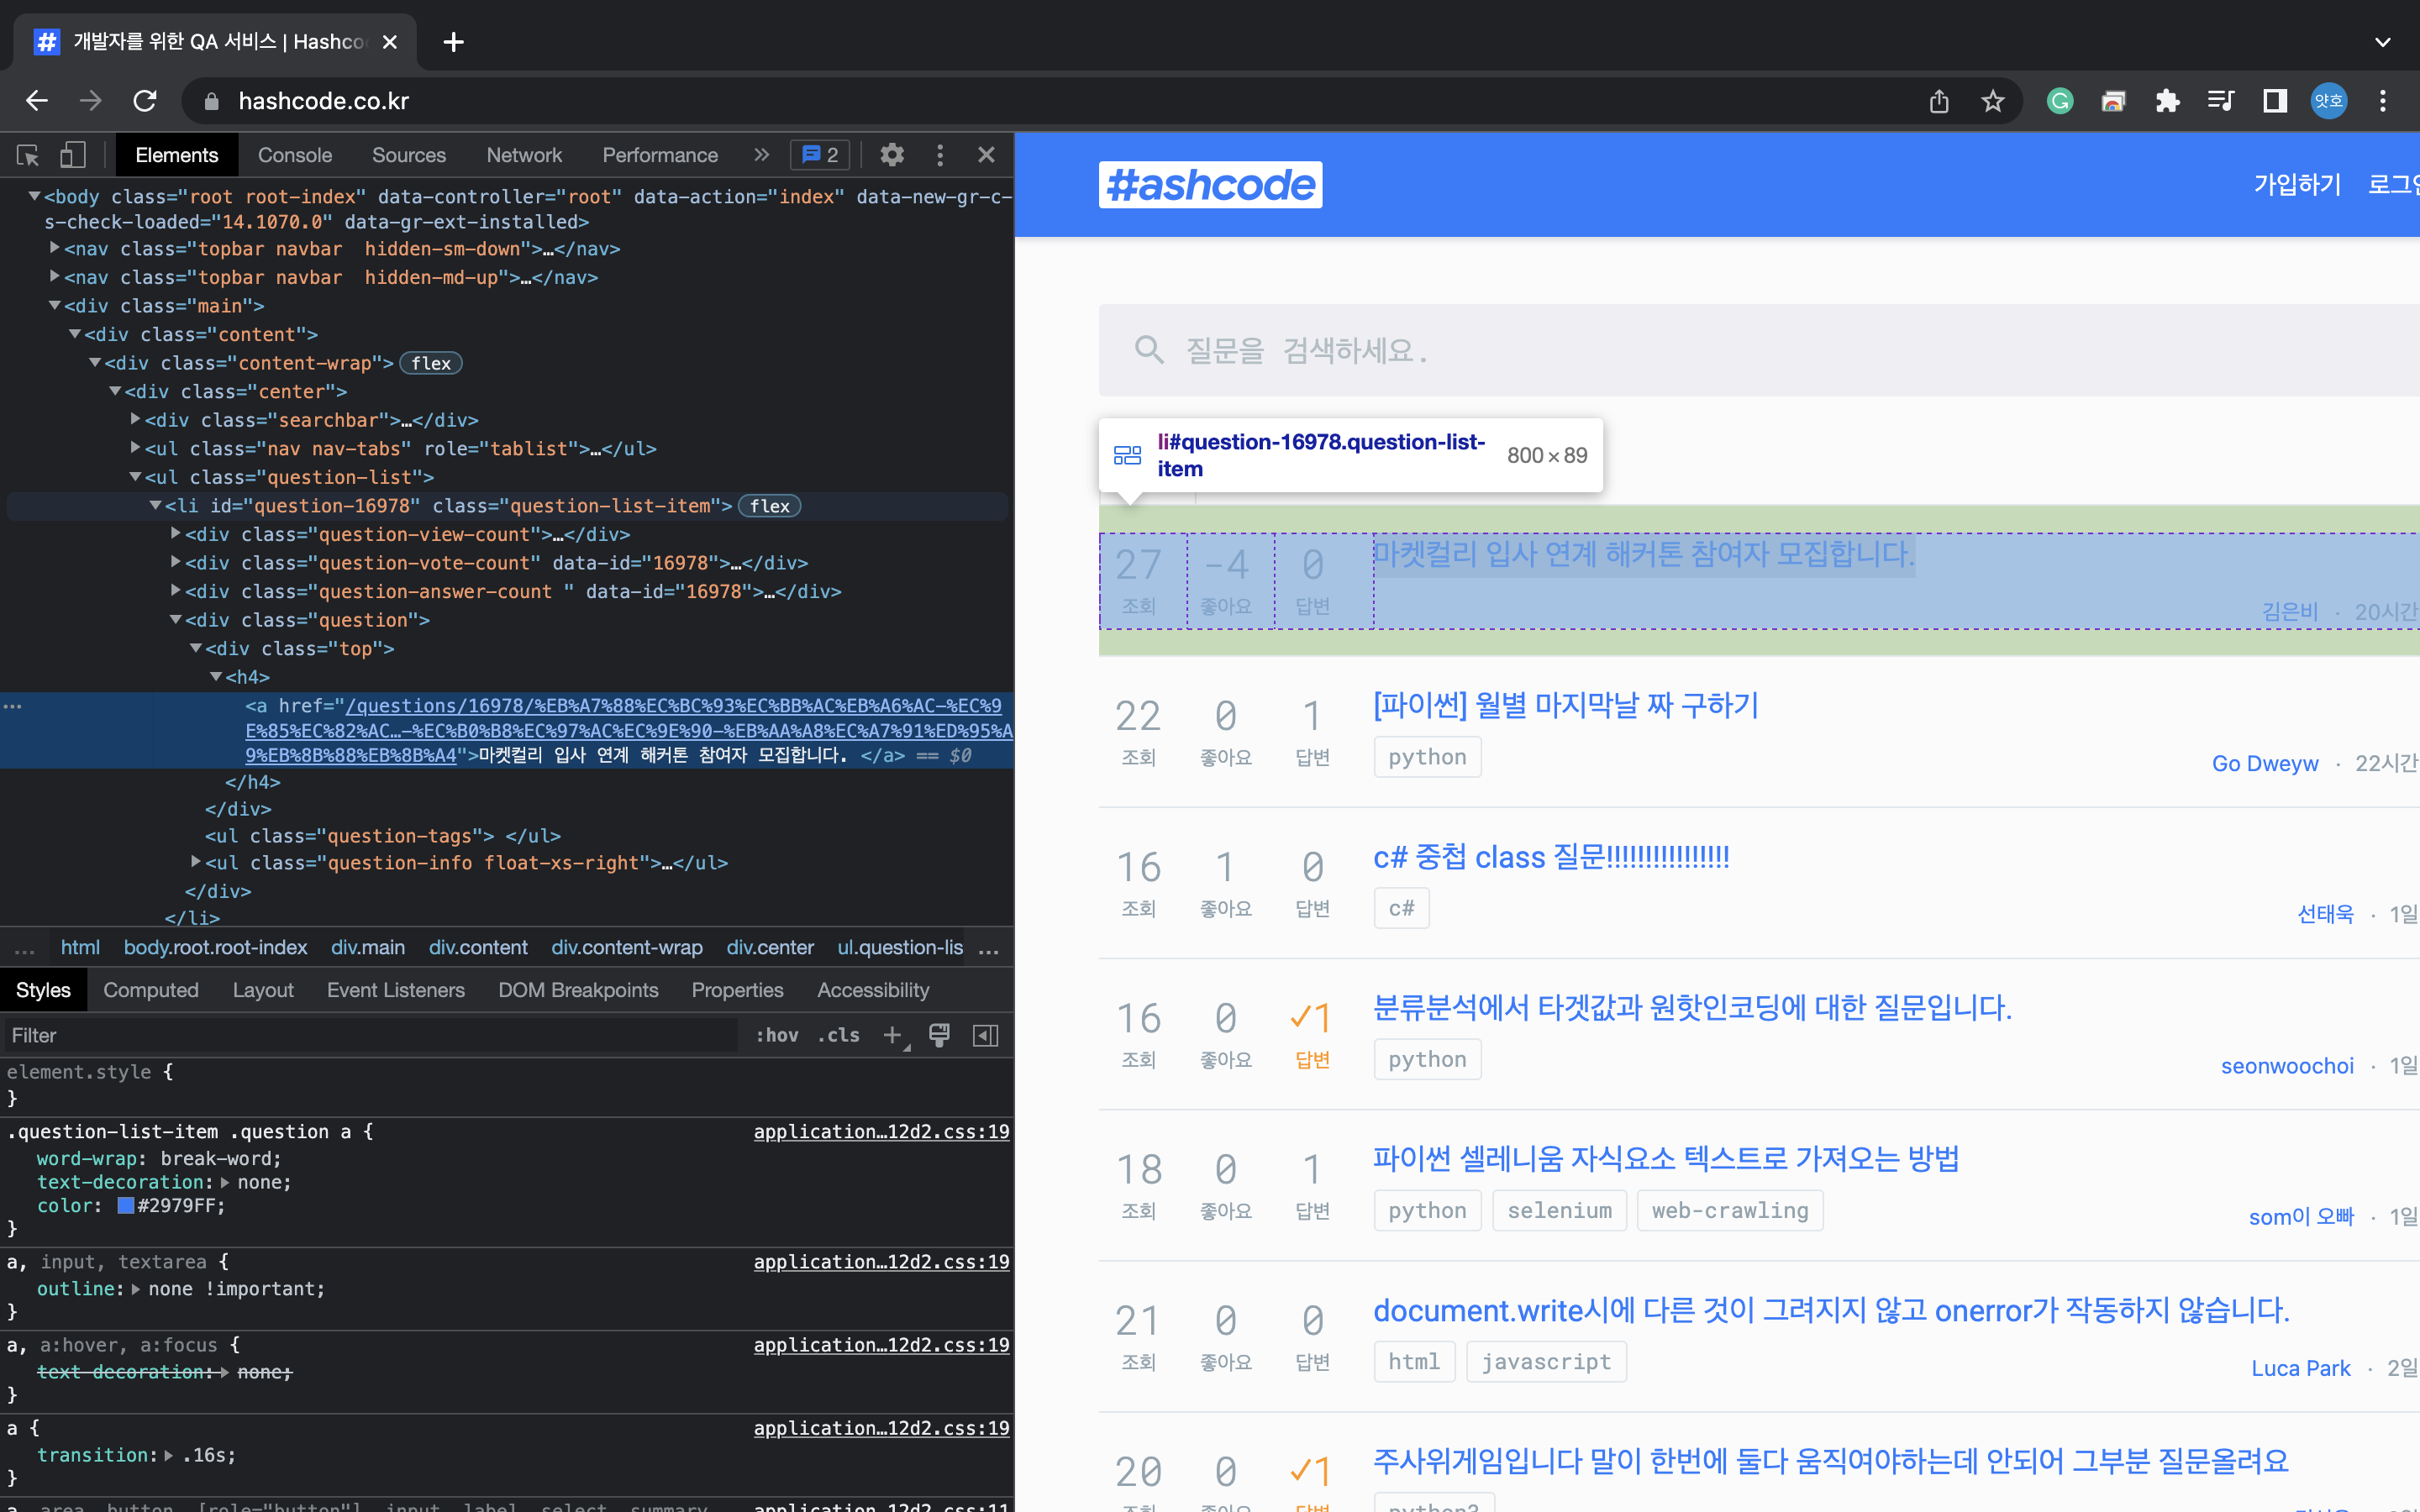



#### 0-2. User-Agent 추가하기
나의 user agent 명시해주기!

In [88]:
user_agent = {"User-Agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"}

#### 0-3. 웹스크래핑에 필요한 라이브러리 불러오기: requests, BeautifulSoup
#### 1. 웹사이트에 요청 & BeautifulSoup 객체로 불러오기

In [90]:
target= "https://hashcode.co.kr/"
res= req.get(target, user_agent)
soup= BeautifulSoup(res.text, "html.parser")

#### 2. locator 이용해서 질문 목록 가져오기


In [114]:
questions = soup.find_all("li","question-list-item")

Qlist=[]
for q in questions:
    Qlist.append(q.find("div","question").find("div","top").h4.text)

print(Qlist)

['파이썬 중간평가 calculator( numbers ) ', '마켓컬리 입사 연계 해커톤 참여자 모집합니다. ', '[파이썬] 월별 마지막날 짜 구하기', 'c# 중첩 class 질문!!!!!!!!!!!!!!!!', '분류분석에서 타겟값과 원핫인코딩에 대한 질문입니다.', '파이썬 셀레니움 자식요소 텍스트로 가져오는 방법', 'document.write시에 다른 것이 그려지지 않고 onerror가 작동하지 않습니다.', '주사위게임입니다 말이 한번에 둘다 움직여야하는데 안되어 그부분 질문올려요', '크롤링으로 태그 속성 값을 가져오려면 어떻게 해야 할까요?', '파이썬 from typing import List 에 관한 질문 ', "파이썬 random.shuffle 함수/리스트/튜플 TypeError: 'NoneType' object is not iterable", '파이썬 파일 생성관련 오류 질문', '분류값에 대해 없는 값 추가하기', '코드에 변수를 넣어서 결과 값을 보고 싶은데 어디에 어떻게 넣어야 될지 모르겠습니다.', '날짜별 시간대별 카운트', '데이터프레임 관련 함수를 define 했는데, 실제 데이터가 바뀌지 않습니다.', 'HTML canvas에서 그린 도형에 대한 값을 구하고 싶습니다..', '광고 삭제', '파이썬 이터레이터 질문', '씨언어 문자열 역순으로 출력하기', '문자열을 실수로 바꾸려다가 나온 string index out of range 오류관련 질문입니다', '광고 삭제', 'node.js request 관련 질문 드립니다', '로지스틱 회귀분석 질문드려요', '파이썬 구조적 프로그램을 객체지향 프로그램으로 만드는법', 'eclipse 프로젝트 실행시 콘솔창 에러', '플러터 stream 질문입니다', '특정 폴더내 이미지파일 불필요한 이름을 지우고싶습니다.', '뒤로가기한번하면 어플이 종료가되네요 ', '컴파일이 안되는 현상에 관해서 질문드립니다. ', '파이썬 문자열 찾기 ', '딕셔너리 밸류 값을 조건에 맞게 일괄 

In [115]:
len(Qlist)

50

#### 3. 모든 pagination 에서의 질문 목록 가져오기
#### Pagination

<img src="https://miro.medium.com/max/950/1*08WWrD_YO6VTWilNMeiVCg.png" width="400">

페이지네이션은 많은 정보를 인덱스로 구분하는 기법이다.  
이 사이트에서는 query string을 이용해 구분하는데, 이것을 이용하여 모든 페이지에서의 질문들을 가져올 수 있을 것!
<br><br>
⚠️ <br>
- 모든 페이지네이션에서 가져오기 위해 요청을 반복하면 윤리적 위배가 될 수 있음!<br>
  따라서 조금 시간 차를 두고 요청을 해야할 것.<br>
  --> time 라이브러리에서 `time.sleep(dt)` 이용
  <br>
- `https://hashcode.co.kr/?page={i}`



In [119]:
import time 

Qlist=[]
for i in range(1, 6): #5페이지ㄲㅏ지!
    res= req.get("https://hashcode.co.kr/?page={}".format(i), user_agent)
    soup= BeautifulSoup(res.text, "html.parser")
    
    questions = soup.find_all("li","question-list-item")


    for q in questions:
        Qlist.append(q.find("div","question").find("div","top").h4.text)

    time.sleep(0.5)

In [122]:
print(len(Qlist))
Qlist[-20:]

250


['fgetc으로 파일에 있는 모든 문자 받아서 출력하기',
 '파이썬 flask 실시간으로 데이터 보여주기',
 'c언어 이진탐색으로 원하는 값의 위치 찾기',
 '비전공자 초보입니다!!! ㅠㅠ 자바 코딩좀 도와주세요!!',
 '안드로이드 권한 부여 질문',
 '파이썬 코드 에러',
 'node js 파일 업로드 질문있어요',
 'R에서 HTTP error 404 에러 발생시',
 '안드로이드 스튜디오 자바 서버에 연결',
 '파이썬 딕셔너리 while문 등록 코드 ',
 '파이썬 리스트 문제 질문',
 'SQL 질문입니다. 많은 테이블에 같은 쿼리를 자동으로 돌리고 싶습니다.',
 'QT designer에 matplotlib 기능 추가 하고 십자 커서 표시를 할려고 합니다.',
 '\t백준 2981  문제 Segmentation fault 오류 부분',
 '자바 bufferedReader 출력 관련 질문입니다.',
 'dict 연습문제인데 도와주세요',
 'c++ for 문 조건식에 함수의 리턴 값을 직접 넣으면 변수에 리턴 값을 넣는 것과 왜다른가요',
 'bash 쉘 while문 질문입니다',
 '연습문제 힌트좀 주시면 감사하겠습니다',
 '안드로이드 스튜디오 첫화면 변경']